In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('linkedin_dataframe.csv')

In [3]:
df.columns

Index(['linkedinProfile', 'mail', 'description', 'location', 'imgUrl',
       'firstName', 'lastName', 'fullName', 'subscribers', 'connectionDegree',
       'vmid', 'linkedinSalesNavigatorUrl', 'connectionsCount',
       'connectionsUrl', 'mutualConnectionsUrl', 'mutualConnectionsCount',
       'company', 'companyUrl', 'jobTitle', 'jobLocation', 'jobDateRange',
       'company2', 'companyUrl2', 'jobTitle2', 'jobDescription2',
       'jobLocation2', 'jobDateRange2', 'school', 'schoolUrl', 'schoolDegree',
       'schoolDescription', 'schoolDegreeSpec', 'schoolDateRange', 'school2',
       'schoolUrl2', 'schoolDegree2', 'schoolDescription2',
       'schoolDegreeSpec2', 'schoolDateRange2', 'websiteFromDropContact',
       'birthday', 'companyWebsite', 'allSkills', 'skill1', 'endorsement1',
       'skill2', 'endorsement2', 'skill3', 'endorsement3', 'skill4',
       'endorsement4', 'skill5', 'endorsement5', 'skill6', 'endorsement6',
       'baseUrl', 'profileId', 'timestamp', 'jobDescription

In [4]:
df.isnull().sum()

linkedinProfile         20
mail                   926
description            264
location                21
imgUrl                 186
                      ... 
website                892
mailFromDropcontact    933
twitter                929
facebookUrl            996
headline               693
Length: 65, dtype: int64

In [0]:
df = df[df['location'].notnull()]

In [6]:
df.shape

(979, 65)

In [7]:
df.fillna(0)

,linkedinProfile,mail,description,location,imgUrl,firstName,lastName,fullName,subscribers,connectionDegree,vmid,linkedinSalesNavigatorUrl,connectionsCount,connectionsUrl,mutualConnectionsUrl,mutualConnectionsCount,company,companyUrl,jobTitle,jobLocation,jobDateRange,company2,companyUrl2,jobTitle2,jobDescription2,jobLocation2,jobDateRange2,school,schoolUrl,schoolDegree,schoolDescription,schoolDegreeSpec,schoolDateRange,school2,schoolUrl2,schoolDegree2,schoolDescription2,schoolDegreeSpec2,schoolDateRange2,websiteFromDropContact,birthday,companyWebsite,allSkills,skill1,endorsement1,skill2,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,baseUrl,profileId,timestamp,jobDescription,civilityFromDropContact,website,mailFromDropcontact,twitter,facebookUrl,headline
0,https://www.linkedin.com/in/eli-k-theard-03857...,elitheard2@gmail.com,New work mobile \n406-203-8478\n\nWant to meet...,"Austin y alrededores, Texas, Estados Unidos",https://media-exp1.licdn.com/dms/image/C5603AQ...,Eli K.,Theard,Eli K. Theard,4404.0,2nd,ACoAACfzOewBDbbTdkOsfy4z9zbsktmsGbHhGTs,https://www.linkedin.com/sales/people/ACoAACfz...,500.0,https://www.linkedin.com/search/results/people...,https://www.linkedin.com/search/results/people...,2.0,Round Rock Hyundai,https://www.linkedin.com/company/energy-soluti...,Financial Services Consultant,Round Rock Texas,dic. de 2019 – actualidad,Round Rock Hyundai,https://www.linkedin.com/company/energy-soluti...,Vehicle Specialist,"Energy savings consultation, with a speciality...",Round Rock Texas,feb. de 2019 – dic. de 2019,Naval School of Health Sciences,https://www.linkedin.com/search/results/all/?k...,Certified,"Field, Emergent and Clinical Medicine, Medica...",Field and Clinical Medicine,1988 – 1988,Benson Polytechnic,https://www.linkedin.com/search/results/all/?k...,Graduate,"Life, Physical, and Health Sciences. Technolog...","Technical and Scientific, Communications",1984 – 1988,www.esultd.com,2 de marzo,http://www.esultd.com/,"Sales Management, Business Relationship Manage...",Sales Management,23.0,Business Relationship Management,22,Customer Service,20.0,Sales,8.0,Account Management,7.0,Marketing,7.0,https://www.linkedin.com/in/eli-k-theard-03857...,eli-k-theard-038571168,2020-04-15T17:00:58.690Z,0,0,0,0,0,0,0
1,https://www.linkedin.com/in/ahmed-abdelmonem-k...,0,Seeking for a challenging position in a reputa...,Arabia Saudita,https://media-exp1.licdn.com/dms/image/C5603AQ...,Ahmed Abdelmonem,Kamal,Ahmed Abdelmonem Kamal,22614.0,3rd,ACoAABmde7QBFgXtC4l6JpKkDmFG3B6dhT1WVD0,https://www.linkedin.com/sales/people/ACoAABmd...,500.0,https://www.linkedin.com/search/results/people...,https://www.linkedin.com/search/results/people...,0.0,Al-Futtaim,https://www.linkedin.com/company/al-futtaim/,Customer Service Manager - Order Fulfillment C...,"Al-Riyadh Governorate, Saudi Arabia",abr. de 2019 – actualidad,Al-Futtaim,https://www.linkedin.com/company/al-futtaim/,Admin Executive, Opening Team for three HomeWorks stores in R...,"Al-Riyadh Governorate, Saudi Arabia",ene. de 2017 – abr. de 2019,Helwan University Cairo,https://www.linkedin.com/school/12171/?legacyS...,Bachelors of management and business administr...,0,"Business Administration and Management, General",2003 – 2008,0,0,0,0,0,0,www.alfuttaim.com,13 de enero,http://www.alfuttaim.com/,"Management, Customer Service, Team Leadership,...",Management,99.0,Customer Service,99,Team Leadership,99.0,Retail,88.0,Inventory Management,78.0,Payroll,77.0,https://www.linkedin.com/in/ahmed-abdelmonem-k...,ahmed-abdelmonem-kamal-758b0abb,2020-04-15T17:02:06.167Z, Launched the 1st E-commerce website for Al-F...,Monsieur,0,0,0,0,0
2,https://www.linkedin.com/in/allen-staines-058b...,0,Having created RollsChoice Adhesive Pen after ...,"San Diego y alrededores, Estados Unidos",https://media-exp1.licdn.com/dms/image/C4E03AQ...,Allen,Staines,Allen Staines,8706.0,3rd,ACoAABO904QBHVkLte63JGy0RCyy8Z2FCi7x5hg,https://www.linkedin.com/sales/people/ACoAABO

In [8]:
df['company'].value_counts()

Self-employed                      5
IBM                                3
Self Employed                      3
Confidential                       3
Self-Employed                      3
                                  ..
BDO UK LLP                         1
C.I.T.\n        Jornada parcial    1
Party City                         1
VisAbility (Ltd)                   1
Finelli Agency                     1
Name: company, Length: 908, dtype: int64

In [9]:
pip install googletrans

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=c642e3197b18301de68b3d0a60381d6b837f611e79fe723a461978b61e0ef4c5
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


In [0]:
from googletrans import Translator
translator = Translator()

In [11]:
df['location']

0            Austin y alrededores, Texas, Estados Unidos
1                                         Arabia Saudita
2                San Diego y alrededores, Estados Unidos
3      Orange County y alrededores, California, Estad...
4                         Saltillo y alrededores, México
                             ...                        
995                                  Seattle, Washington
996         Salt Lake City y alrededores, Estados Unidos
997                                           Ames, Iowa
998           NCR - National Capital Region, Philippines
999                             Pittsburgh, Pennsylvania
Name: location, Length: 979, dtype: object

In [0]:
import re
def text(x):
  word1 = " ".join(re.findall("[a-zA-Zñé]+", x))
  return word1

In [0]:
df['location'] = df['location'].astype('str')

In [0]:
df['location'] = df['location'].map(lambda x: text(x))

In [15]:
df['location']

0              Austin y alrededores Texas Estados Unidos
1                                         Arabia Saudita
2                 San Diego y alrededores Estados Unidos
3      Orange County y alrededores California Estados...
4                          Saltillo y alrededores México
                             ...                        
995                                   Seattle Washington
996          Salt Lake City y alrededores Estados Unidos
997                                            Ames Iowa
998              NCR National Capital Region Philippines
999                              Pittsburgh Pennsylvania
Name: location, Length: 979, dtype: object

In [0]:
def gtrans(x):
  translator = Translator()
  if x != '0':
    a = translator.translate(x)
    a = a.text
  else:
    a = 0
  return a

In [0]:
df['location'] = df['location'].astype('str').map(lambda x: gtrans(x))

In [21]:
df['location']

0              Austin Area Texas United States
1                                 Saudi Arabia
2                 San Diego Area United States
3       Orange County California United States
4                         Saltillo Area Mexico
                        ...                   
995                         Seattle Washington
996          Salt Lake City Area United States
997                                  Ames Iowa
998    NCR National Capital Region Philippines
999                    Pittsburgh Pennsylvania
Name: location, Length: 979, dtype: object

In [22]:
df.dtypes

linkedinProfile        object
mail                   object
description            object
location               object
imgUrl                 object
                        ...  
website                object
mailFromDropcontact    object
twitter                object
facebookUrl            object
headline               object
Length: 65, dtype: object

In [80]:
pip install pyspellchecker

     |████████████████████████████████| 1.9MB 3.5MB/s 


In [86]:
from spellchecker import SpellChecker
spell = SpellChecker()
j = 'Analystics'
n = spell.candidates(j)
type(n)

set

In [118]:
col = list(df.columns)
col

['linkedinProfile',
 'mail',
 'description',
 'location',
 'imgUrl',
 'firstName',
 'lastName',
 'fullName',
 'subscribers',
 'connectionDegree',
 'vmid',
 'linkedinSalesNavigatorUrl',
 'connectionsCount',
 'connectionsUrl',
 'mutualConnectionsUrl',
 'mutualConnectionsCount',
 'company',
 'companyUrl',
 'jobTitle',
 'jobLocation',
 'jobDateRange',
 'company2',
 'companyUrl2',
 'jobTitle2',
 'jobDescription2',
 'jobLocation2',
 'jobDateRange2',
 'school',
 'schoolUrl',
 'schoolDegree',
 'schoolDescription',
 'schoolDegreeSpec',
 'schoolDateRange',
 'school2',
 'schoolUrl2',
 'schoolDegree2',
 'schoolDescription2',
 'schoolDegreeSpec2',
 'schoolDateRange2',
 'websiteFromDropContact',
 'birthday',
 'companyWebsite',
 'allSkills',
 'skill1',
 'endorsement1',
 'skill2',
 'endorsement2',
 'skill3',
 'endorsement3',
 'skill4',
 'endorsement4',
 'skill5',
 'endorsement5',
 'skill6',
 'endorsement6',
 'baseUrl',
 'profileId',
 'timestamp',
 'jobDescription',
 'civilityFromDropContact',
 'websit

In [29]:
df

,linkedinProfile,mail,description,location,imgUrl,firstName,lastName,fullName,subscribers,connectionDegree,vmid,linkedinSalesNavigatorUrl,connectionsCount,connectionsUrl,mutualConnectionsUrl,mutualConnectionsCount,company,companyUrl,jobTitle,jobLocation,jobDateRange,company2,companyUrl2,jobTitle2,jobDescription2,jobLocation2,jobDateRange2,school,schoolUrl,schoolDegree,schoolDescription,schoolDegreeSpec,schoolDateRange,school2,schoolUrl2,schoolDegree2,schoolDescription2,schoolDegreeSpec2,schoolDateRange2,websiteFromDropContact,birthday,companyWebsite,allSkills,skill1,endorsement1,skill2,endorsement2,skill3,endorsement3,skill4,endorsement4,skill5,endorsement5,skill6,endorsement6,baseUrl,profileId,timestamp,jobDescription,civilityFromDropContact,website,mailFromDropcontact,twitter,facebookUrl,headline
0,https://www.linkedin.com/in/eli-k-theard-03857...,elitheard2@gmail.com,New work mobile \n406-203-8478\n\nWant to meet...,Austin Area Texas United States,https://media-exp1.licdn.com/dms/image/C5603AQ...,Eli K.,Theard,Eli K. Theard,4404.0,2nd,ACoAACfzOewBDbbTdkOsfy4z9zbsktmsGbHhGTs,https://www.linkedin.com/sales/people/ACoAACfz...,500.0,https://www.linkedin.com/search/results/people...,https://www.linkedin.com/search/results/people...,2.0,Round Rock Hyundai,https://www.linkedin.com/company/energy-soluti...,Financial Services Consultant,Round Rock Texas,dic. de 2019 – actualidad,Round Rock Hyundai,https://www.linkedin.com/company/energy-soluti...,Vehicle Specialist,"Energy savings consultation, with a speciality...",Round Rock Texas,feb. de 2019 – dic. de 2019,Naval School of Health Sciences,https://www.linkedin.com/search/results/all/?k...,Certified,"Field, Emergent and Clinical Medicine, Medica...",Field and Clinical Medicine,1988 – 1988,Benson Polytechnic,https://www.linkedin.com/search/results/all/?k...,Graduate,"Life, Physical, and Health Sciences. Technolog...","Technical and Scientific, Communications",1984 – 1988,www.esultd.com,2 de marzo,http://www.esultd.com/,"Sales Management, Business Relationship Manage...",Sales Management,23.0,Business Relationship Management,22,Customer Service,20.0,Sales,8.0,Account Management,7.0,Marketing,7.0,https://www.linkedin.com/in/eli-k-theard-03857...,eli-k-theard-038571168,2020-04-15T17:00:58.690Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.linkedin.com/in/ahmed-abdelmonem-k...,NaN,Seeking for a challenging position in a reputa...,Saudi Arabia,https://media-exp1.licdn.com/dms/image/C5603AQ...,Ahmed Abdelmonem,Kamal,Ahmed Abdelmonem Kamal,22614.0,3rd,ACoAABmde7QBFgXtC4l6JpKkDmFG3B6dhT1WVD0,https://www.linkedin.com/sales/people/ACoAABmd...,500.0,https://www.linkedin.com/search/results/people...,https://www.linkedin.com/search/results/people...,NaN,Al-Futtaim,https://www.linkedin.com/company/al-futtaim/,Customer Service Manager - Order Fulfillment C...,"Al-Riyadh Governorate, Saudi Arabia",abr. de 2019 – actualidad,Al-Futtaim,https://www.linkedin.com/company/al-futtaim/,Admin Executive, Opening Team for three HomeWorks stores in R...,"Al-Riyadh Governorate, Saudi Arabia",ene. de 2017 – abr. de 2019,Helwan University Cairo,https://www.linkedin.com/school/12171/?legacyS...,Bachelors of management and business administr...,NaN,"Business Administration and Management, General",2003 – 2008,NaN,NaN,NaN,NaN,NaN,NaN,www.alfuttaim.com,13 de enero,http://www.alfuttaim.com/,"Management, Customer Service, Team Leadership,...",Management,99.0,Customer Service,99,Team Leadership,99.0,Retail,88.0,Inventory Management,78.0,Payroll,77.0,https://www.linkedin.com/in/ahmed-abdelmonem-k...,ahmed-abdelmonem-kamal-758b0abb,2020-04-15T17:02:06.167Z, Launched the 1st E-commerce website for Al-F...,Monsieur,NaN,NaN,NaN,NaN,NaN
2,https://www.linkedin.com/in/allen-staines-058b...,NaN,Having created RollsChoice Adhesive Pen after ...,San Diego Area United States,https://media-exp1.licdn.com/dms/image/C4E03AQ...,Allen,Staines,Allen Staines,8706.0,3rd,ACoAABO904QBHVkLte63JGy0RCyy8Z2FCi7x5hg,https://www.linkedin.com/sales/p

In [0]:
def degree(x):
  ug = 0
  pg = 0
  ug_pg = 0
  bachelor = ['BS','Bachelors','Bachelor',"Bachelor's",'B.S','B.S.','Undergraduate','Under-Graduate']
  master = ['MS','MPS','Master','Masters',"Master's",'M.S','M.S.','Graduate']
  management = ['Management','Business','Finance','Marketing']
  science = ['Science','Mathematics','Maths','Psychology','Physics','Microbiology','Geography','Design','Geography','Environment','Environmental','Geology','Geological','Human','Cognitive','Communication','Communications']
  t = [management,science]
  m = [0,0]
  tp_deg_ug = [0,0]
  tp_deg_pg = [0,0]
  tp_deg_ug_pg = [0,0]
  t1 = [tp_deg_ug,tp_deg_pg,tp_deg_ug_pg]
  mgmt = 0
  engg = 0
  sci = 0
  tech = 0
  med = 0
  oth = 0
  col = list(df.columns)
  deg_idx = col.index('schoolDegree')
  deg_des_idx = col.index('schoolDescription')
  deg2_idx = col.index('schoolDegree2')
  deg2_des_idx = col.index('schoolDescription2')
  for i in df.iterrows():
    i = i[1]
    c = 0
    c1 = 0
    c2 = 0
    c3 = 0
    for j in bachelor:
      a = re.search(j,str(i[deg_idx]))
      if str(type(a)) !=  "<class 'NoneType'>":
        c += 1
      if c > 1:
        c = 1
    if c == 1:
      ug += 1
    for k in master:
      b = re.search(k,str(i[deg_idx]))
      if str(type(b)) !=  "<class 'NoneType'>":
        c1 += 1
      if c1 > 1:
        c1 = 1
    if c1 == 1:
      pg += 1
    if str(i[deg2_idx]) != 'nan':
      for j in bachelor:
        a1 = re.search(j,str(i[deg2_idx]))
        if str(type(a1)) !=  "<class 'NoneType'>":
          c2 += 1
        if c2 > 1:
          c2 = 1
      if c2 == 1:
        ug += 1
      for k in master:
        b1 = re.search(k,str(i[deg2_idx]))
        if str(type(b1)) !=  "<class 'NoneType'>":
          c3 += 1
        if c3 > 1:
          c3 = 1
      if c3 == 1:
        ug_pg += 1
    if c3 == 1:
      for i1,j in enumerate(t):
        for j1 in j:
          n1 = re.search(j1,str(i[deg2_des_idx]))
          if str(type(n1)) !=  "<class 'NoneType'>":
            m[i1] += 1
          if m[i1] > 1:
            m[i1] = 1
        if m[i1] == 1:
          tp_deg_ug_pg[i1] += 1
    elif c1 == 1:
      for i1,j in enumerate(t):
        for j1 in j:
          n1 = re.search(j1,str(i[deg2_des_idx]))
          if str(type(n1)) !=  "<class 'NoneType'>":
            m[i1] += 1
          if m[i1] > 1:
            m[i1] = 1
        if m[i1] == 1:
          tp_deg_ug[i1] += 1
    elif c == 1 | c2 ==1:
      for i1,j in enumerate(t):
        for j1 in j:
          n1 = re.search(j1,str(i[deg2_des_idx]))
          if str(type(n1)) !=  "<class 'NoneType'>":
            m[i1] += 1
          if m[i1] > 1:
            m[i1] = 1
        if m[i1] == 1:
          tp_deg_pg[i1] += 1
  return ug,pg,ug_pg,tp_deg_pg,tp_deg_ug,tp_deg_ug_pg

In [0]:
a1,a2,a3,a4,a5,a6 = degree(df)

In [0]:
deg_type = ['Management', 'Science']
df_plot = pd.DataFrame({'Masters':a4,'Bachelors':a5,'Bachelors and Masters':a6}, index=deg_type)

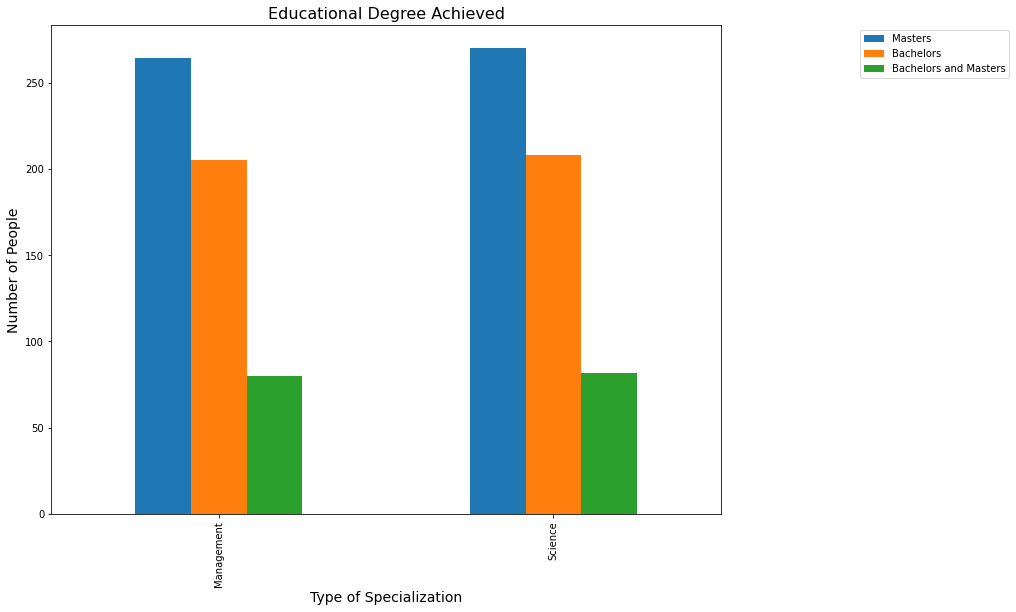

In [159]:
import matplotlib.pyplot as plt
_=df_plot.plot.bar()
fig=plt.gcf()
fig.set_size_inches(12,9)
_=plt.legend(bbox_to_anchor=(1.2,1),loc='upper left')
_=fig=plt.title('Educational Degree Achieved',fontsize=16)
_=fig=plt.xlabel('Type of Specialization',fontsize=14)
_=fig=plt.ylabel('Number of People',fontsize=14)

In [151]:
print(b1,b2,b3,b4,b5,b6)

463 238 82 [264, 202, 270] [205, 166, 208] [80, 62, 82]


In [99]:
type(u)

tuple

In [0]:
u1 = u[1]

In [128]:
str(u1[1])

'nan'

In [135]:
for i,j in enumerate(a):
  print(i,j)

0 1
1 2
2 3
3 5
4 6
5 7
6 8
7 9


In [132]:
m[1]

0

In [60]:
o = 'Master'
re.search('as',o)

<_sre.SRE_Match object; span=(1, 3), match='as'>

In [76]:
df[df['schoolDegree'].map(lambda x:str(x).lower()) == 'certified']['schoolDegree'].notnull().sum()

1